Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


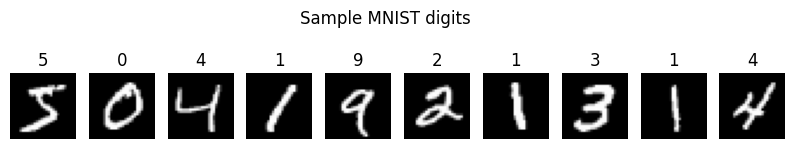

Flattened train shape: (60000, 784)
Flattened test shape: (10000, 784)
Train: (48000, 784) (48000,)
Val:   (12000, 784) (12000,)


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Validation Accuracy: 0.9123
Logistic Regression - Test Accuracy:       0.9150
Classification Report (Logistic Regression - Test Set):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.89      0.90      0.89      1010
           4       0.93      0.93      0.93       982
           5       0.88      0.86      0.87       892
           6       0.93      0.94      0.93       958
           7       0.93      0.92      0.92      1028
           8       0.86      0.86      0.86       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000



C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 800x800 with 0 Axes>

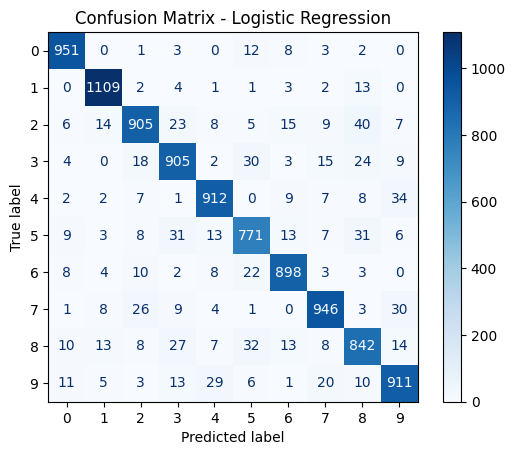

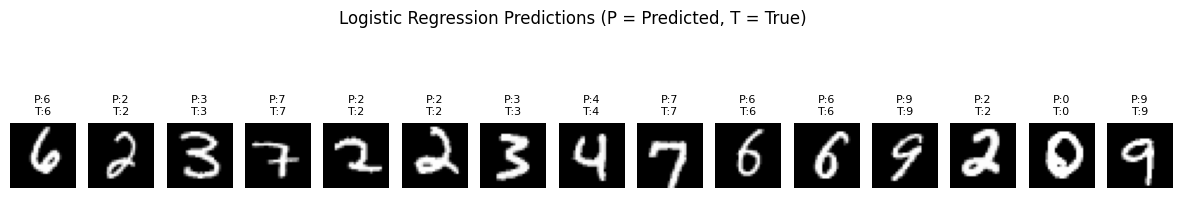

Random Forest - Validation Accuracy: 0.9693
Random Forest - Test Accuracy:       0.9687


<Figure size 800x800 with 0 Axes>

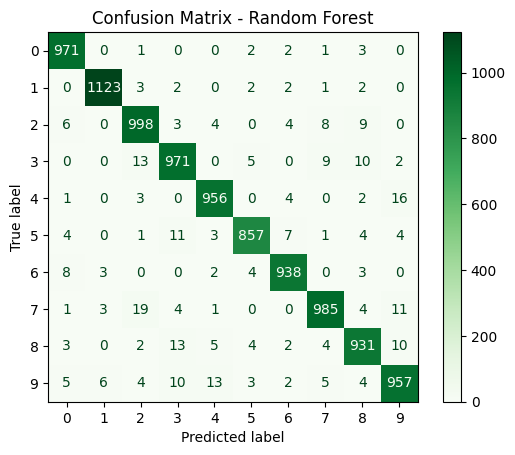

NN Train: (48000, 28, 28)
NN Val:   (12000, 28, 28)
NN Test:  (10000, 28, 28)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8958 - loss: 0.3731 - val_accuracy: 0.9428 - val_loss: 0.1950
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9545 - loss: 0.1561 - val_accuracy: 0.9565 - val_loss: 0.1443
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9673 - loss: 0.1107 - val_accuracy: 0.9648 - val_loss: 0.1163
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9745 - loss: 0.0843 - val_accuracy: 0.9682 - val_loss: 0.1071
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9803 - loss: 0.0665 - val_accuracy: 0.9673 - val_loss: 0.1079


In [13]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# For the neural network (optional part C)
from tensorflow import keras
from tensorflow.keras import layers
# Load MNIST from Keras
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Train images shape:", x_train_full.shape)  # (60000, 28, 28)
print("Train labels shape:", y_train_full.shape)
print("Test images shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
# Show first 10 images with their labels
plt.figure(figsize=(10, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_full[i], cmap="gray")
    plt.title(y_train_full[i])
    plt.axis("off")

plt.suptitle("Sample MNIST digits")
plt.show()
# Normalize pixel values to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten: (n_samples, 28, 28) -> (n_samples, 784)
x_train_full_flat = x_train_full.reshape(len(x_train_full), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

print("Flattened train shape:", x_train_full_flat.shape)
print("Flattened test shape:", x_test_flat.shape)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full_flat,
    y_train_full,
    test_size=0.2,
    random_state=42
)

print("Train:", x_train.shape, y_train.shape)
print("Val:  ", x_val.shape, y_val.shape)
# To train faster, we can optionally use a subset of data
# Comment out these two lines if your system is strong
subset_size = 20000
x_train_small = x_train[:subset_size]
y_train_small = y_train[:subset_size]

log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(x_train_small, y_train_small)

# Evaluate on validation and test set
y_val_pred_lr = log_reg.predict(x_val)
y_test_pred_lr = log_reg.predict(x_test_flat)

val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression - Validation Accuracy: {val_acc_lr:.4f}")
print(f"Logistic Regression - Test Accuracy:       {test_acc_lr:.4f}")
print("Classification Report (Logistic Regression - Test Set):")
print(classification_report(y_test, y_test_pred_lr))
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=np.arange(10))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
# Show 15 random test images with predicted & true labels
np.random.seed(42)
indices = np.random.choice(len(x_test), size=15, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = y_test[idx]
    pred_label = y_test_pred_lr[idx]

    plt.subplot(1, 15, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"P:{pred_label}\nT:{true_label}", fontsize=8)
    plt.axis("off")

plt.suptitle("Logistic Regression Predictions (P = Predicted, T = True)")
plt.show()
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(x_train, y_train)

y_val_pred_rf = rf_clf.predict(x_val)
y_test_pred_rf = rf_clf.predict(x_test_flat)

val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Validation Accuracy: {val_acc_rf:.4f}")
print(f"Random Forest - Test Accuracy:       {test_acc_rf:.4f}")
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.arange(10))
disp.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()
# Use unflattened images for NN
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(
    x_train_full,         # (60000, 28, 28)
    y_train_full,
    test_size=0.2,
    random_state=42
)

print("NN Train:", x_train_nn.shape)
print("NN Val:  ", x_val_nn.shape)
print("NN Test: ", x_test.shape)
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),                  # 28*28 -> 784
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for digits 0-9
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
history = model.fit(
    x_train_nn, y_train_nn,
    validation_data=(x_val_nn, y_val_nn),
    epochs=5,
    batch_size=128
)
